In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns


In [2]:
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
# Remove unwanted "plan duration" column
df.drop('Plan Duration', inplace=True, axis=1)

In [6]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone


In [7]:
#

df['Join Date'] = pd.to_datetime(df['Join Date'], dayfirst=True)
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], dayfirst=True)




/tmp/ipykernel_20/629371235.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Join Date'] = pd.to_datetime(df['Join Date'], dayfirst=True)
/tmp/ipykernel_20/629371235.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], dayfirst=True)


In [8]:
# Add 3 columns to get duration of subscription in days and months, also total revenue for each subscribers

df['Subscription Duration in days'] = (df['Last Payment Date'] - df['Join Date']).dt.days

df['Subscription Duration in months'] = df['Subscription Duration in days'] / 30  

df['Total Revenue'] = df['Monthly Revenue'] * df['Subscription Duration in months']

df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Subscription Duration in days,Subscription Duration in months,Total Revenue
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,511,17.033333,170.333333
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,655,21.833333,327.500000
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,119,3.966667,47.600000
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,351,11.700000,140.400000
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,58,1.933333,19.333333


In [9]:
# change datatype of months and total revenue coloumn to get whole numbers 

df['Total Revenue'] = df['Total Revenue'].astype(int)

df['Subscription Duration in months'] = df['Subscription Duration in months'].astype(int)

df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Subscription Duration in days,Subscription Duration in months,Total Revenue
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,511,17,170
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,655,21,327
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,119,3,47
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,351,11,140
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,58,1,19


Now We are ready for analysis and visualisation

Text(0, 0.5, '')

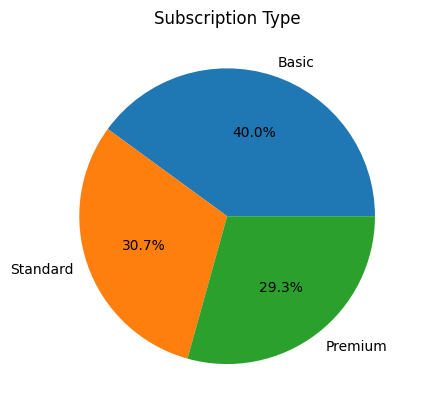

In [10]:
# First we will check substription type distribution among users

df['Subscription Type'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Subscription Type')
plt.ylabel('')



Text(0, 0.5, '')

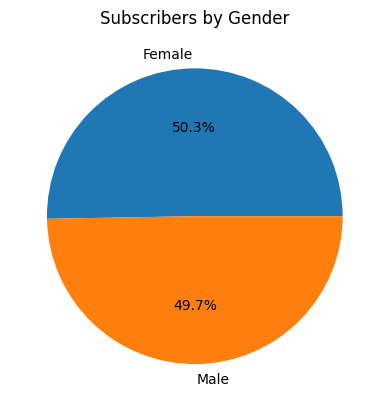

In [11]:

df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Subscribers by Gender')
plt.ylabel('')

Text(0, 0.5, '')

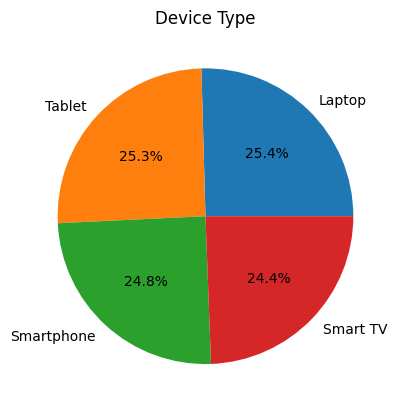

In [12]:
df['Device'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Device Type')
plt.ylabel('')

Text(0.5, 0, 'Country')

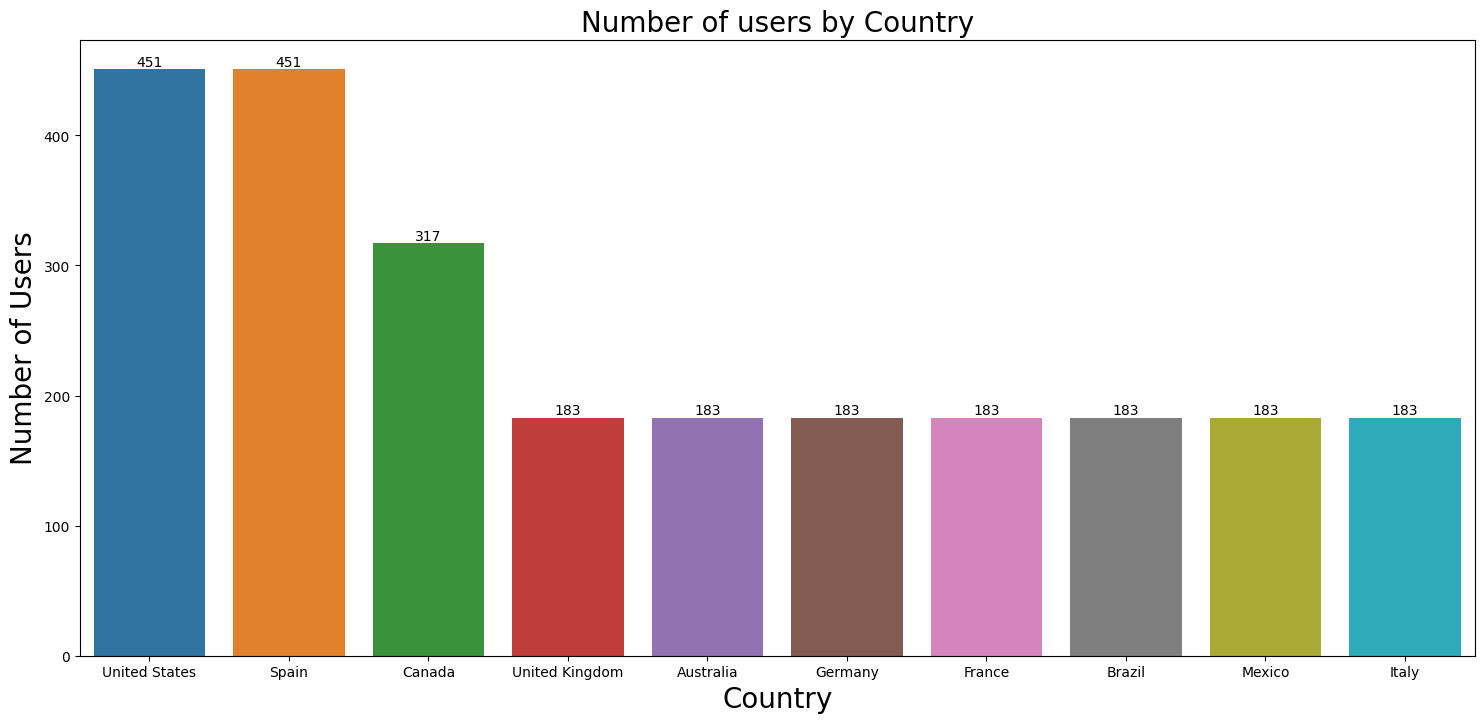

In [13]:
# now lets check number of users by country

plt.figure(figsize=(18,8))
a = sns.countplot(x='Country', data=df, order = df['Country'].value_counts().index)
for bars in a.containers:
    a.bar_label(bars)

plt.title('Number of users by Country', fontsize=20)
plt.ylabel('Number of Users', fontsize=20)
plt.xlabel('Country', fontsize=20)
    

Text(0.5, 0, 'Age')

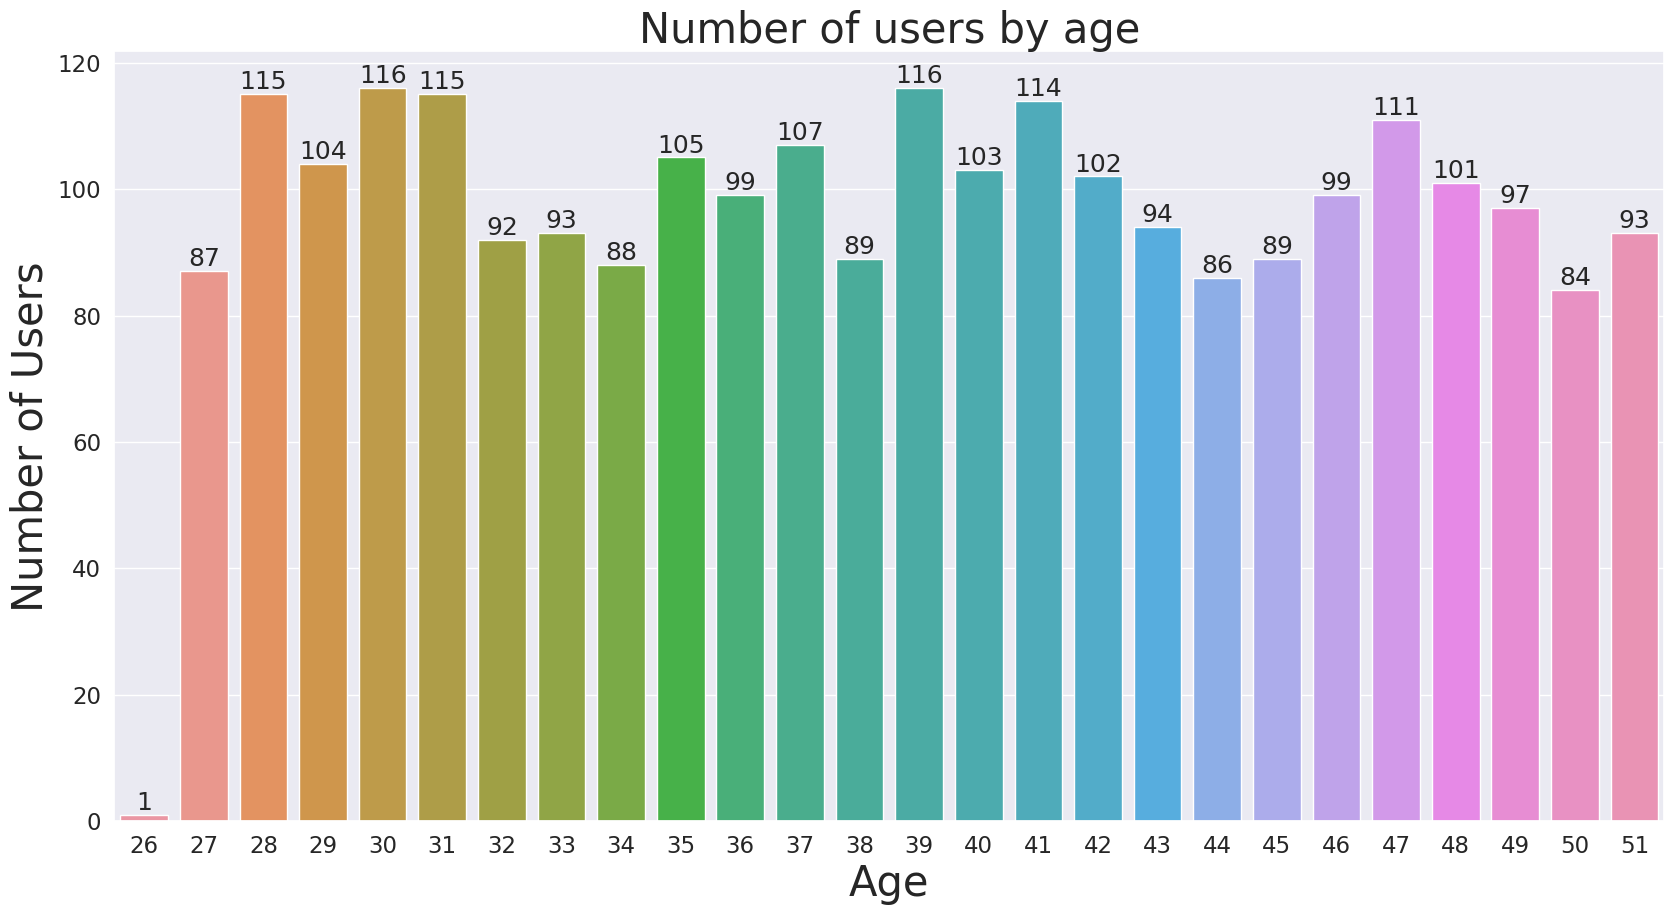

In [14]:
# Number of users by age

plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
a = sns.countplot(x='Age', data=df)
for bars in a.containers:
    a.bar_label(bars)

plt.title('Number of users by age', fontsize=30)
plt.ylabel('Number of Users',fontsize=30)
plt.xlabel('Age',fontsize=30)

In [15]:
# Monthly revenue by country

df_grp = df.groupby(['Country'])['Monthly Revenue'].sum().reset_index()
df_grp.sort_values('Monthly Revenue',ascending= False, inplace=True)
df_grp


,Country,Monthly Revenue
9,United States,5664
7,Spain,5662
2,Canada,3950
8,United Kingdom,2318
5,Italy,2317
3,France,2307
1,Brazil,2285
0,Australia,2271
4,Germany,2260
6,Mexico,2237


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Brazil'),
  Text(7, 0, 'Australia'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Mexico')])

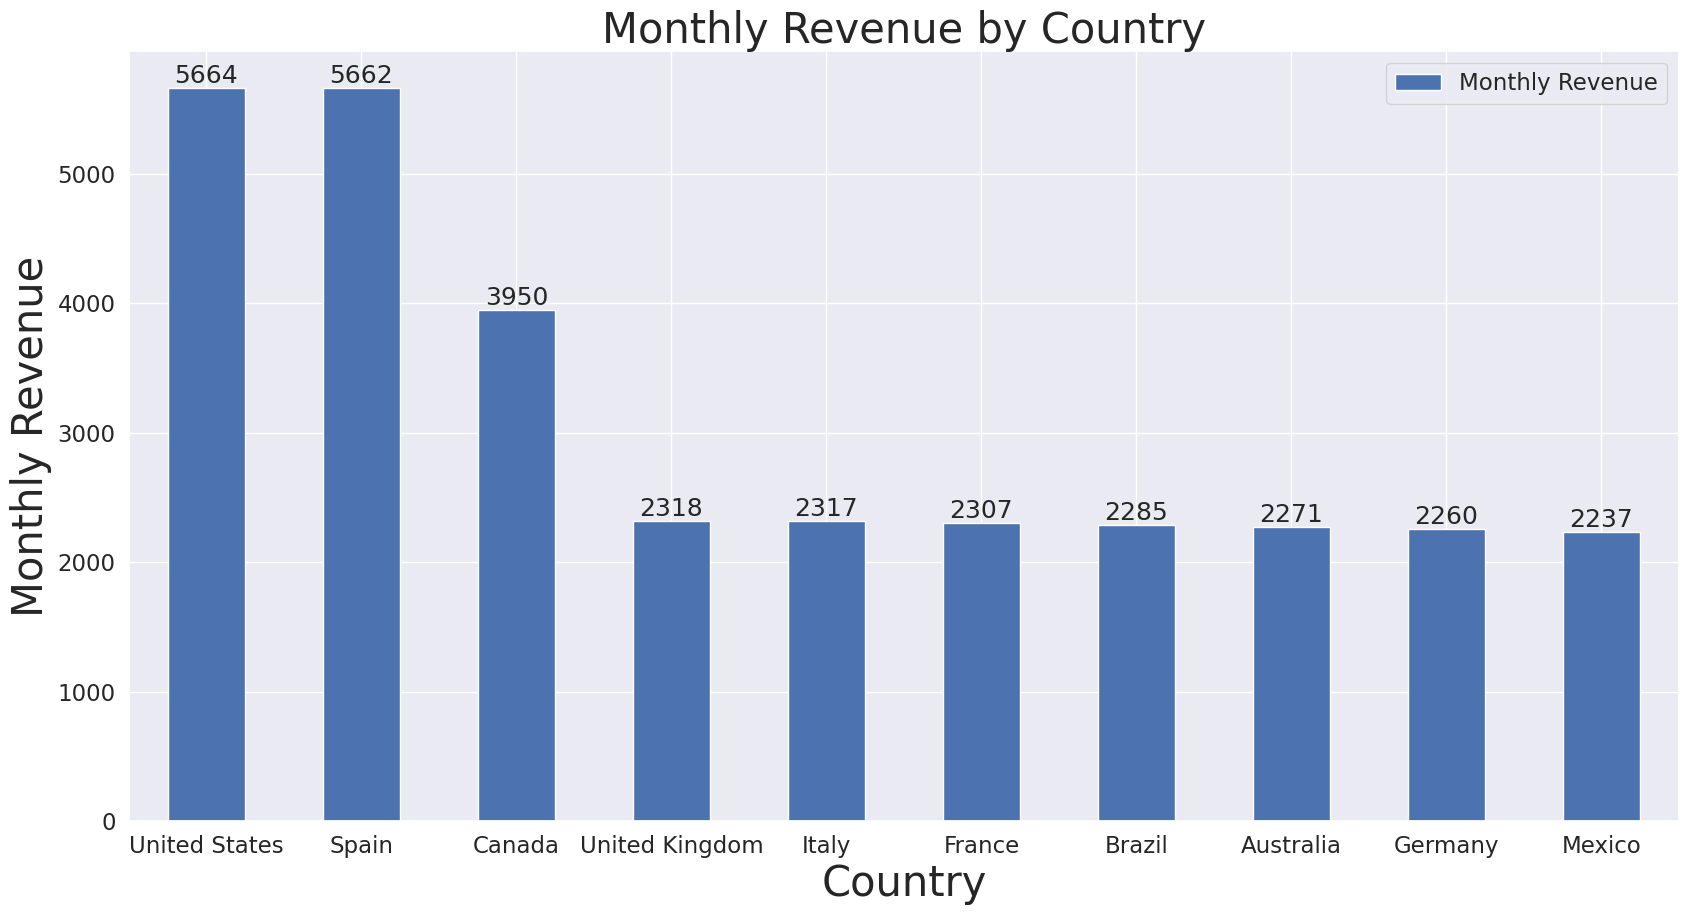

In [16]:
df_grp = df.groupby(['Country'])['Monthly Revenue'].sum().reset_index()
df_grp.sort_values('Monthly Revenue',ascending= False, inplace=True)



splot=df_grp.plot('Country', kind='bar', figsize=(20, 10))
plt.bar_label(splot.containers[0])


plt.title('Monthly Revenue by Country', fontsize=30)
plt.ylabel('Monthly Revenue',fontsize=30)
plt.xlabel('Country',fontsize=30)
plt.xticks(rotation=0)


In [17]:
# Total revenue by country
df_grp1 = df.groupby(['Country'])['Total Revenue'].sum().reset_index()
df_grp1.sort_values('Total Revenue',ascending= False, inplace=True)
df_grp1

,Country,Total Revenue
9,United States,57493
7,Spain,56346
2,Canada,40994
3,France,24899
8,United Kingdom,24786
1,Brazil,23788
0,Australia,23782
4,Germany,23138
6,Mexico,23021
5,Italy,22396


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'France'),
  Text(4, 0, 'United Kingdom'),
  Text(5, 0, 'Brazil'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'Germany'),
  Text(8, 0, 'Mexico'),
  Text(9, 0, 'Italy')])

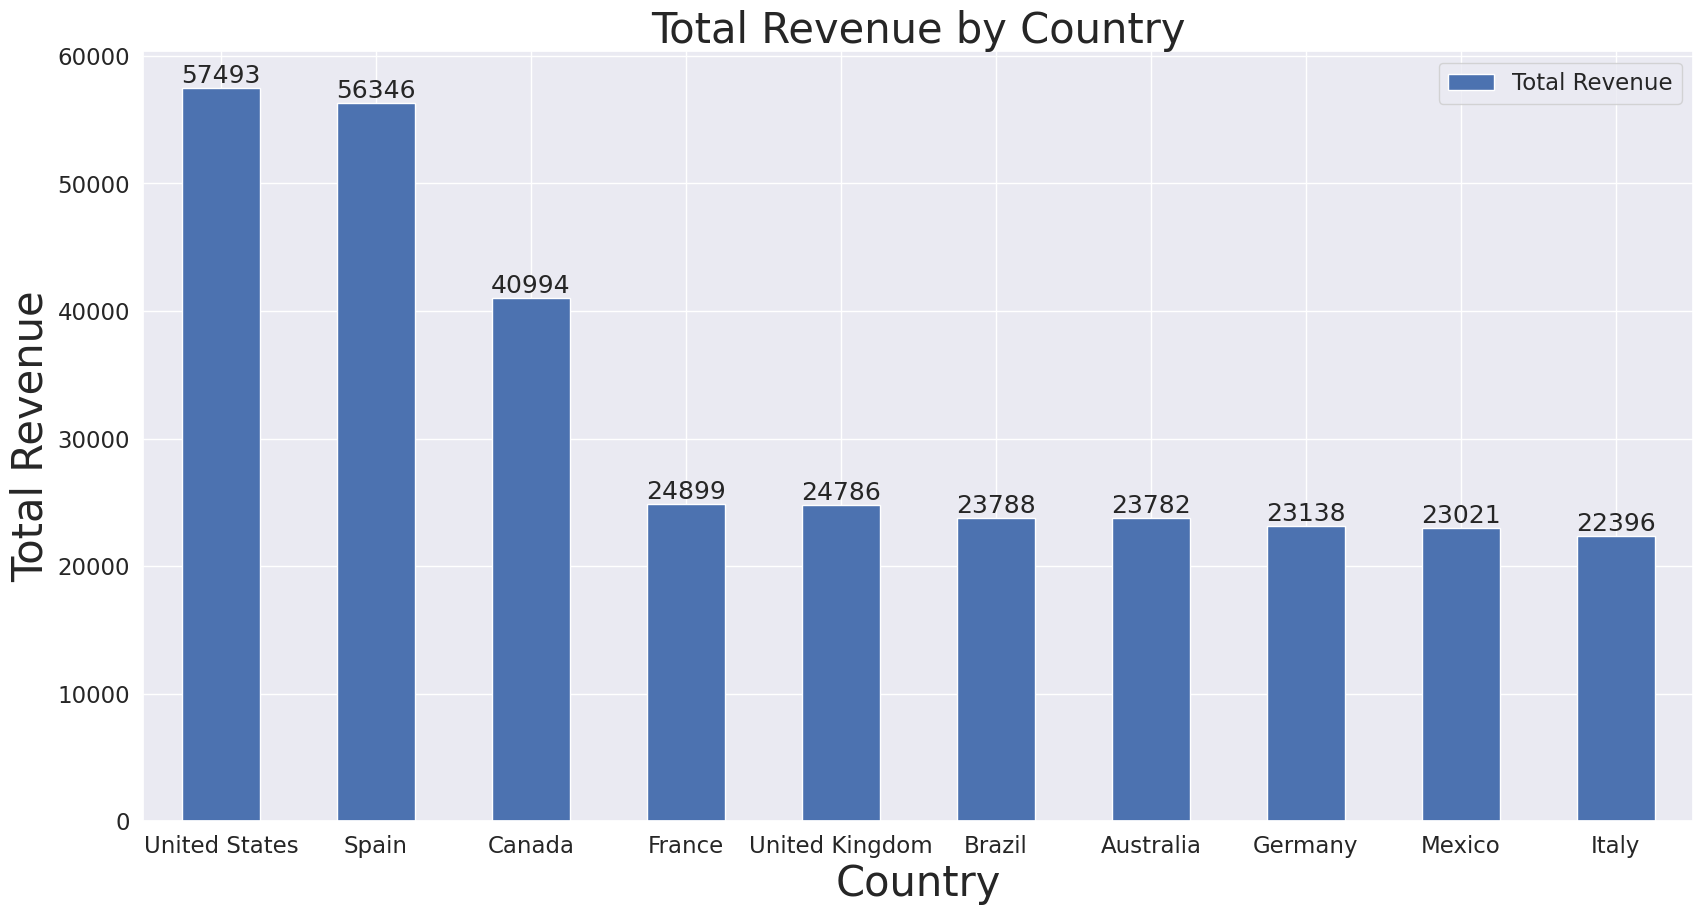

In [18]:
df_grp1 = df.groupby(['Country'])['Total Revenue'].sum().reset_index()
df_grp1.sort_values('Total Revenue',ascending= False, inplace=True)



splot=df_grp1.plot('Country', kind='bar', figsize=(20, 10))
plt.bar_label(splot.containers[0])


plt.title('Total Revenue by Country', fontsize=30)
plt.ylabel('Total Revenue',fontsize=30)
plt.xlabel('Country',fontsize=30)
plt.xticks(rotation=0)

In [19]:
# Total revenue by subscription type

df_grp2 = df.groupby(['Subscription Type'])['Total Revenue'].sum().reset_index()
df_grp2.sort_values('Total Revenue',ascending= False, inplace=True)
df_grp2

,Subscription Type,Total Revenue
0,Basic,127313
2,Standard,98989
1,Premium,94341


(array([0, 1, 2]),
 [Text(0, 0, 'Basic'), Text(1, 0, 'Standard'), Text(2, 0, 'Premium')])

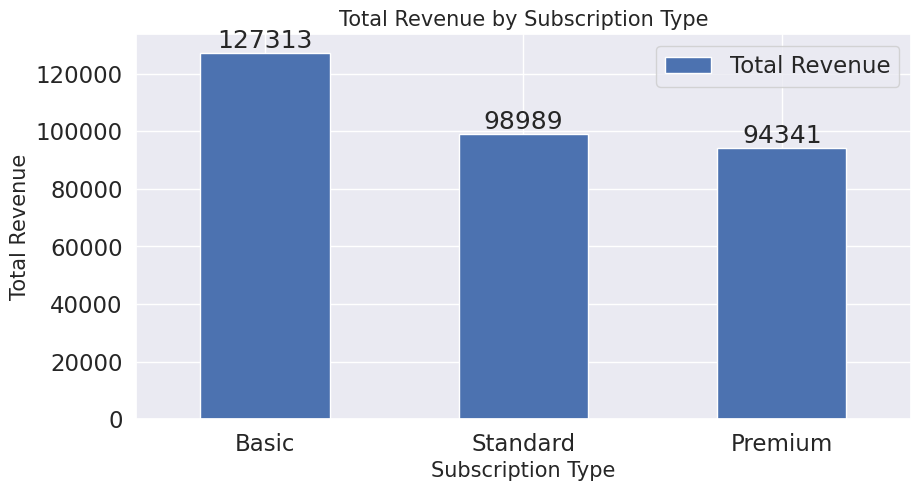

In [20]:
df_grp2 = df.groupby(['Subscription Type'])['Total Revenue'].sum().reset_index()
df_grp2.sort_values('Total Revenue',ascending= False, inplace=True)



splot=df_grp2.plot('Subscription Type', kind='bar', figsize=(10, 5))
plt.bar_label(splot.containers[0])


plt.title('Total Revenue by Subscription Type', fontsize=15)
plt.ylabel('Total Revenue',fontsize=15)
plt.xlabel('Subscription Type',fontsize=15)
plt.xticks(rotation=0)

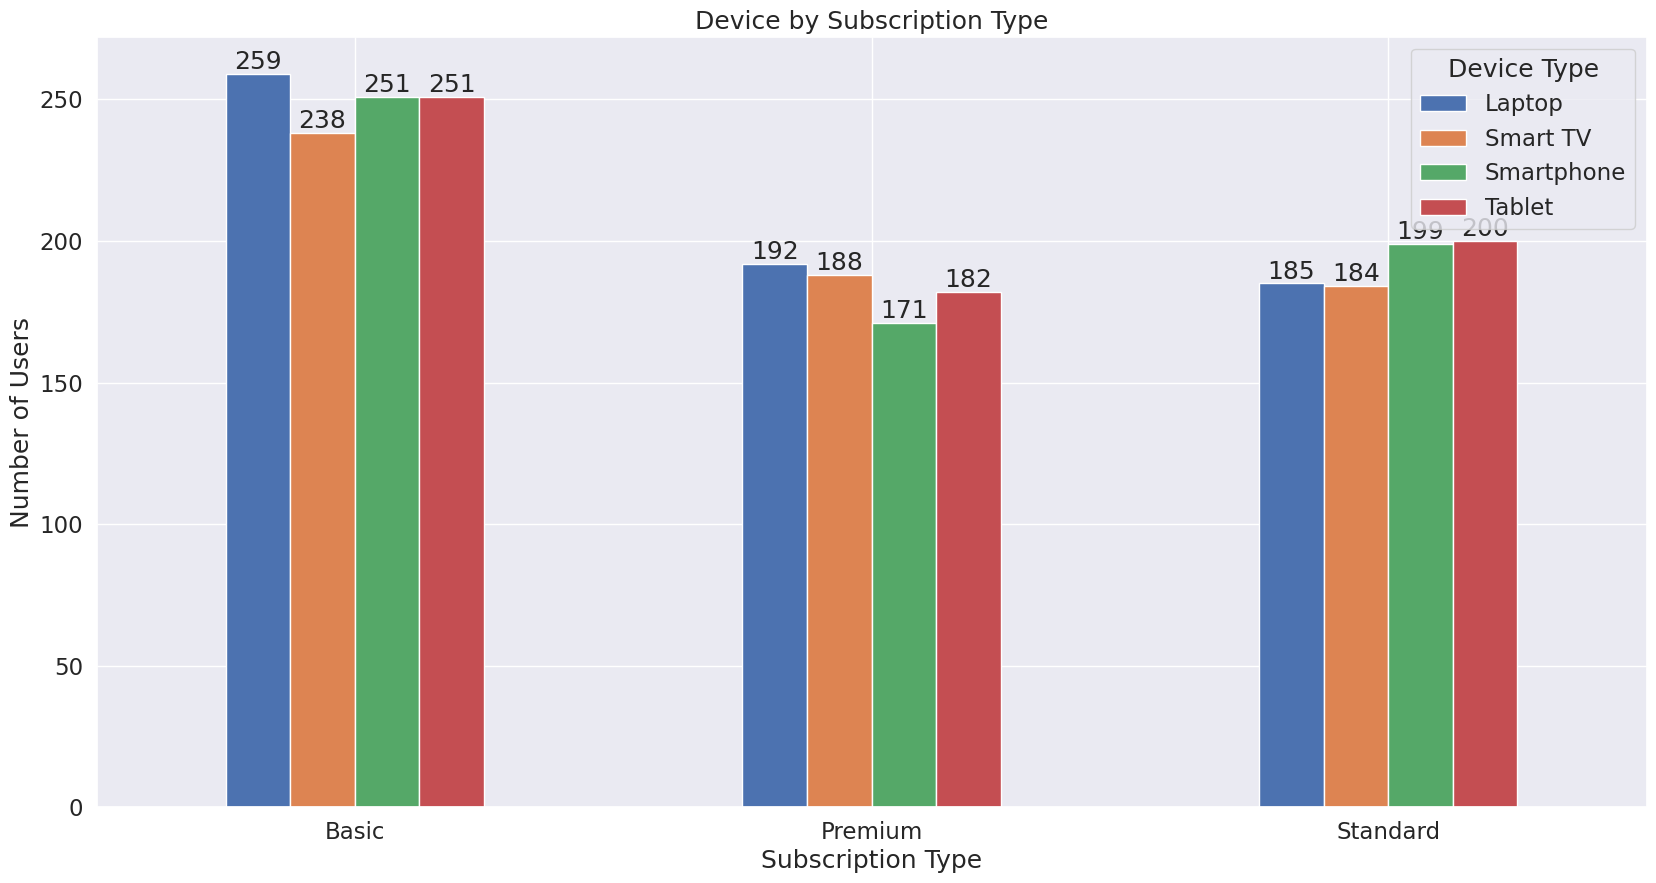

In [21]:
# Device Distribution by Subscription Type
device_by_subscription = df.groupby(['Subscription Type', 'Device']).size().unstack()
plot=device_by_subscription.plot(kind='bar', stacked=False, figsize=(20, 10))
plt.bar_label(plot.containers[0])
plt.bar_label(plot.containers[1])
plt.bar_label(plot.containers[2])
plt.bar_label(plot.containers[3])
plt.title('Device by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title='Device Type')


Conclusion:

As we can see from above visuals 'Basic' subscription is popular amoung users and also it generates more revenue than other two.
Also almost half of the users and revenue generated comes from three countries USA, Spain and Canada.